### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado? -> la segunda red ha dado mejor resultado

Para compilar el modelo, usa:

In [7]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray

# se carga el conjunto de datos para su análisis
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

In [2]:
train_images.shape

(50000, 32, 32)

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), input_shape=(32, 32, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))      # dividirá por 2 las dimensiones de alto y ancho de la imagen (de 28x28 @ 14x14)
model.add(layers.Dropout(0.25))     # desactiva un 0'25 de neuronas
model.add(layers.Flatten())
model.add(layers.Dense(32 , activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(train_images.shape)

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
model.fit(train_images, train_labels, epochs=10)

print(train_images.shape)

print('***********')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('***********')

(50000, 32, 32)
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8685 - accuracy: 0.3332
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5994 - accuracy: 0.4371
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4903 - accuracy: 0.4783
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4222 - accuracy: 0.4998
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3717 - accuracy: 0.5183
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3363 - accuracy: 0.5343
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3014 - accuracy: 0.5472
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2768 - accuracy: 0.5549
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2540 - accuracy: 0.5631
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/

In [9]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

model2 = models.Sequential()
model2.add(layers.Conv2D(filters=8, kernel_size=(3, 3), input_shape=(32, 32, 1), padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))      # dividirá por 2 las dimensiones de alto y ancho de la imagen (de 28x28 @ 14x14)
model2.add(layers.Dropout(0.25))     # desactiva un 0'25 de neuronas
model2.add(layers.Flatten())
model2.add(layers.Dense(16 , activation='relu'))
model2.add(layers.Dense(32 , activation='relu'))
model2.add(layers.Dense(10 , activation='softmax'))


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(train_images.shape)

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
model2.fit(train_images, train_labels, epochs=10)

print(train_images.shape)

print('***********')
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('***********')

(50000, 32, 32)
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9876 - accuracy: 0.2671
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7018 - accuracy: 0.3866
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5789 - accuracy: 0.4358
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5122 - accuracy: 0.4627
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4643 - accuracy: 0.4808
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4270 - accuracy: 0.4968
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3947 - accuracy: 0.5082
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3687 - accuracy: 0.5162
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3483 - accuracy: 0.5240
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/s

In [10]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

model3 = models.Sequential()
model3.add(layers.Conv2D(filters=8, kernel_size=(3, 3), input_shape=(32, 32, 1), padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))      # dividirá por 2 las dimensiones de alto y ancho de la imagen (de 28x28 @ 14x14)
model3.add(layers.Dropout(0.25))     # desactiva un 0'25 de neuronas
model3.add(layers.Flatten())
model3.add(layers.Dense(32 , activation='relu'))
model3.add(layers.Dense(16 , activation='relu'))
model3.add(layers.Dense(10 , activation='softmax'))


model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(train_images.shape)

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
model3.fit(train_images, train_labels, epochs=10)

print(train_images.shape)

print('***********')
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('***********')

(50000, 32, 32)
Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8883 - accuracy: 0.3094
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6324 - accuracy: 0.4149
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5410 - accuracy: 0.4507
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4818 - accuracy: 0.4763
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4478 - accuracy: 0.4883
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4110 - accuracy: 0.5004
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3864 - accuracy: 0.5124
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3604 - accuracy: 0.5206
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3478 - accuracy: 0.5246
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/st

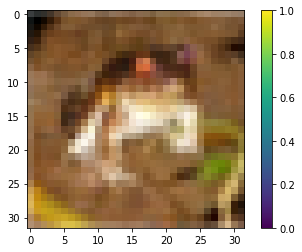

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_labels[0][0]

6

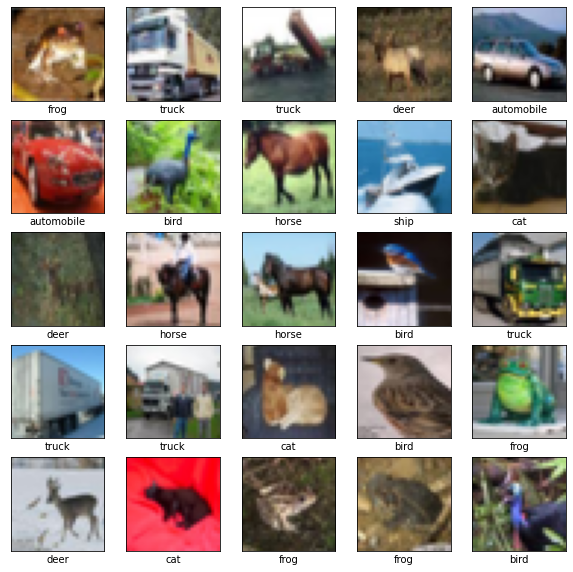

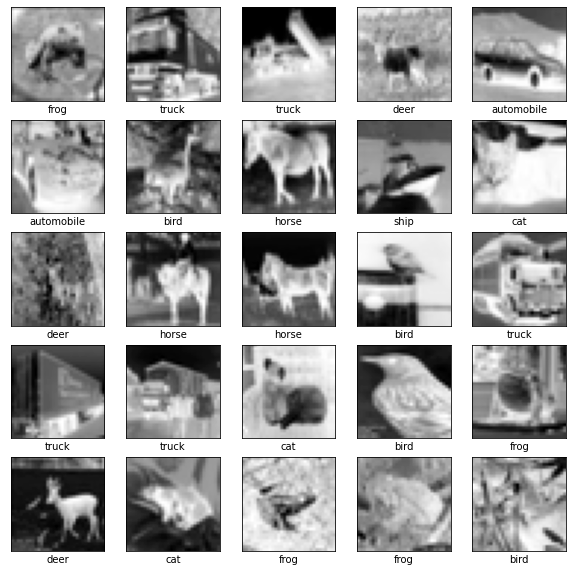

In [16]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
train_images.shape

(50000, 32, 32)

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.